<h1 align='center'>FINAL PROJECT OF ADVANCED STATISTICS FOR PHYSICS ANALYSIS"</h1>
<img align='Center' src='https://800anniunipd.it/wp-content/uploads/2018/12/logo_800anni.png'  style='width:10;'/>


<h2 align='center'>Naive Bayes classifier for Fake News recognition


<h3 align='left'>University of Padua - Physics of Data</h3>

**Name** | **ID number** | 
    
Sarvenaz Babakhani | 20 | 
    
Reza Rajaee | 20 | 
    
Bahaor Amjadi | 20 | 

## Table of contents:
- [Introduction](#Introduction)
- [Theoreticl Background](#Theoreticl-Background)
- [Reading Data](#intro)
- [Splitting into Train and Test](#splitting)
- [Train](#Train)
- [Prediction](#pred)
- [Compact Version](#Comp)
    - [Cleaning and Filtering the Dataset](#clean)
    - [Splitting Data into Train/Test Sets](#split)
    - [Building the Classifer](#build)
- [using functions](#func)
- [using Libraries](#library)
    - [e1071 library](#e1071)
    - [fastNaiveBayes library](#fast)
- [Binomial Classification](#binom)
       
- [Conclusion](#Conclusion)
- [Bibliograohy](#Bibliography)


# Introduction <a class="anchor" id="Introduction"></a>

The idea of fake news is not a novel concept. Notably, the idea has been in existence even before the emergence of
the Internet as publishers used false and misleading information to further their interests. Following the advent of the web, more and more consumers began forsaking the traditional media channels used to disseminate information for online platforms.They are everywhere in our daily life, and come especially from social media platforms and applications in the online world. The aim of the fake news project is to help news readers to identify bias and misinformation in news articles in a quick and reliable fashion.

In this project, we try to implement a Multinomial Naive Bayes classifier in R and test its performances in the classification of social media posts.

Data is taken from Kaggle and it consists of a training set with 10,240 instances and a test set wth 1,267 instances.

# Theoreticl Background <a class="anchor" id="Theoreticl-Background"></a>

Naive Bayes is a simple technique for constructing classifiers.This models assigns class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. There is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable.
For example, a fruit may be considered to be an apple if it is red, round, and about 10 cm in diameter. A naive Bayes classifier considers each of these features to contribute independently to the probability that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features.
it is mostly used for text data analysis and are connected to classification tasks of text in multiple classes.

The crux of this probabilistic machine learning model is based on the Bayes theorem:

$$P(A|B,I)=\frac{P(B|A,I)P(A|I)}{P(B|I)}$$

In this project A is label for each news and B is set of words in that news.
$$B=(b_{1},b_{2},...,b_{n})$$
using chain rule and we will have: 
$$P(A|b_{1},b_{2},...,b_{n},I)=\frac{P(b_{1}|A,I)P(b_{2}|A,I)...P(b_{n}|A,I)P(A|I)}{P(b_{1}|I)P(b_{2}|I)...P(b_{n}|I)}$$

For all entries in each label, the denominator does not change, it remain static. Therefore, the denominator can be removed and a proportionality can be introduced.

$$P(A|b_{1},b_{2},...,b_{n},I)\propto P(A|I)\prod_{i=1}^{n}P(b_{i}|A)$$

Finally, we need to find the class A with maximum probability:
$$A = argmax P(A|I)\prod_{i=1}^{n}P(b_{i}|A)$$

### project procedure
According to this theory, after preparing data, we build and apply our model on training dataset.

Then use two function,"naiveBayes"(from e1071 library) and "fnb.multinomial"(from  fastNaiveBayes library) to compare accuracy and computation time of them with our model. 

Finally we apply the model on the Test dataset.

#### More detail on Algorithm
prepared train dataset is a matrix of all possible words as column names and and thier frequencies in each news.

example 1:

| label | abort | absolut | abus |accept | access | accid
| --- | --- | --- | --- | --- | --- | --- |
| 1 | 1 | 0 | 3 | 0 | 0 | 1 |
| 1 | 1 | 1 | 5 | 0 | 1 | 2 |
| 2 | 2 | 0 | 0 | 0 | 0 | 1 |
| 1 | 0 | 0 | 2 | 0 | 1 | 0 |

To build the model, we grouped data by labels and sum each words' frequencies. By normalizing them to total sum in each group , we find probability of each world in that label ($P(b_{i}|A)$). we also calculate $P(A|I)$ by finding the ratio of the number of each label to their total number.

example 2:

| label_prob | label | abort | absolut | abus |accept | access | accid|
|---| --- | --- | --- | --- | --- | --- | --- |
| 0.2 | 0 | 0.01 | 0 | 0.3 | 0 | 0.5 | 0.001 |
| 0.19 | 1 | 0 | 0.004 | 0.02 | 0.1 | 0 | 0.003 |
| 0.18 | 2 | 0.04 | 0.09 | 0.01 | 0 | 0| 0 |
| 0.21 | 3 | 0 | 0.1 | 0.04 | 0.65 | 0.002 | 0.04 |
| 0.23 | 4 | 0 | 0 | 0.2 | 0.16 | 0.87 | 0.002 |
| 0.17 | 5 | 0.01 | 0 | 0 | 0.19 | 0.4 | 0.3 |



The resulting data frame can be used as model. Since in the next step it will be used to determine prior and likelihood.

Test dataset will be prepared same as train set. For each news there are some words and their frequencies. we should calculate:


$$P(A|I)\prod_{\text{all words of news}}(P(b_{i}|A))^{\text{it's frequncy in test news}}$$

now we just need find which label has the the maximum probabilty.


$\textbf{Notice:}$
As it is mentioned, in train set , each word's frequncy is determined. if the frequency of a word in one label is zero the probability of that in model data frame will be zero ($P(b_{i}|A)=0$). so in calculation of test news when it contains that word, the final probability for that label will be zero, even if other words' probability are high. this cause that label is not the choosen by a wrong reason.
to solve this problem , we add 1 to all frequencies in train data set and we won't have any zero probability for words in test news.

example of the problem:

if one news contains "abort" and "abus", according to tabel in example 2, $p(\text{"abort"}|label_0) = 0$ , to classify this news no matter how $p(\text{"abus"}|label_0)$ is bigger than other labels, $P(lable_0) = 0 $



In [40]:
library(gmodels)
library(tm)
library(SnowballC)
library(e1071)
library(wordcloud)
library(ggplot2)
library(dplyr)
library(lattice)
library(gridExtra)
# library(fastNaiveBayes)


Attaching package: ‘ggplot2’


The following object is masked from ‘package:NLP’:

    annotate




### Reading the Data <a class="anchor" id="intro"></a>

In [35]:
DF <- read.csv("./data/train.csv")
head(DF)
cat("dataset size:", nrow(DF))

,Labels,Text,Text_Tag
,<int>,<fct>,<fct>
1,1,Says the Annies List political group supports third-trimester abortions on demand.,abortion
2,2,When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.,"energy,history,job-accomplishments"
3,3,"Hillary Clinton agrees with John McCain ""by voting to give George Bush the benefit of the doubt on Iran.""",foreign-policy
4,1,Health care reform legislation is likely to mandate free sex change surgeries.,health-care
5,2,The economic turnaround started at the end of my term.,"economy,jobs"
6,5,The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured (UW) faculty fired during the last two decades.,education


dataset size: 10240

filtered dataset size: 10240

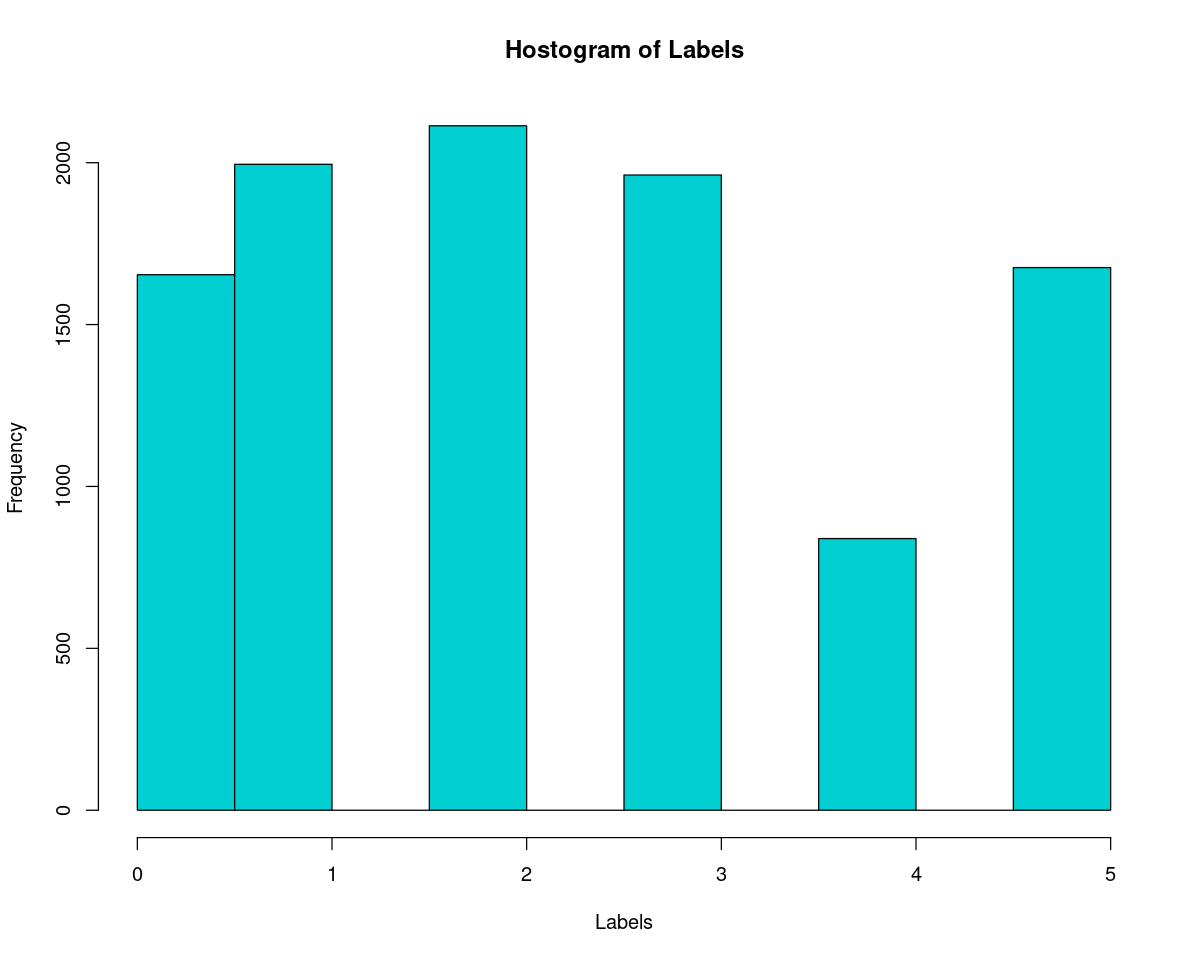

In [36]:
#=======filtering the dataset keeping just the label 5:true and 1:false========#

label.list <- c(0,1,2,3,4,5)   #the labels:0,1,2,3,4,5

#==============================================================================#

df <- DF[DF$Labels %in% label.list, ] #the labels:0,1,2,3,4,5
cat("filtered dataset size:", nrow(df))
# cat("\nNumber of 1 Labels:"      , nrow(df[df$Labels==1, ]))
# cat("\nNumber of 5 Labels:"      , nrow(df[df$Labels==5, ]))
options(repr.plot.width=10, repr.plot.height =8)    #changing size of plots
hist(df$Labels, main='Hostogram of Labels',col='darkturquoise' , xlab='Labels', ,xlim=c(0,5))
hm <- hist(df$Labels, main='Hostogram of Labels',col='darkturquoise' , xlab='Labels', ,xlim=c(0,5))  #saving for later use in the predictor function

In [12]:
df_corp <- VCorpus(VectorSource(as.character(df$Text)))
df_corp

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 10240

## Describe Stemming, stop words

In [13]:
df_corp <-  tm_map(df_corp ,stripWhitespace)                #removing white spaces

In [14]:
df_dtm  <-  DocumentTermMatrix(df_corp,
                           control = list(tolower = TRUE,
                                        removeNumbers = TRUE,
                                        stopwords = TRUE,
                                        removePunctuation = TRUE,
                                        stemming = TRUE))

In [15]:
df_dtm

<<DocumentTermMatrix (documents: 10240, terms: 8414)>>
Non-/sparse entries: 102735/86056625
Sparsity           : 100%
Maximal term length: 68
Weighting          : term frequency (tf)

## Describe The following cell

In [16]:
minfreq = 10
freq_words <-  findFreqTerms(df_dtm, minfreq) 
df_dtm     <-  df_dtm[,freq_words]    

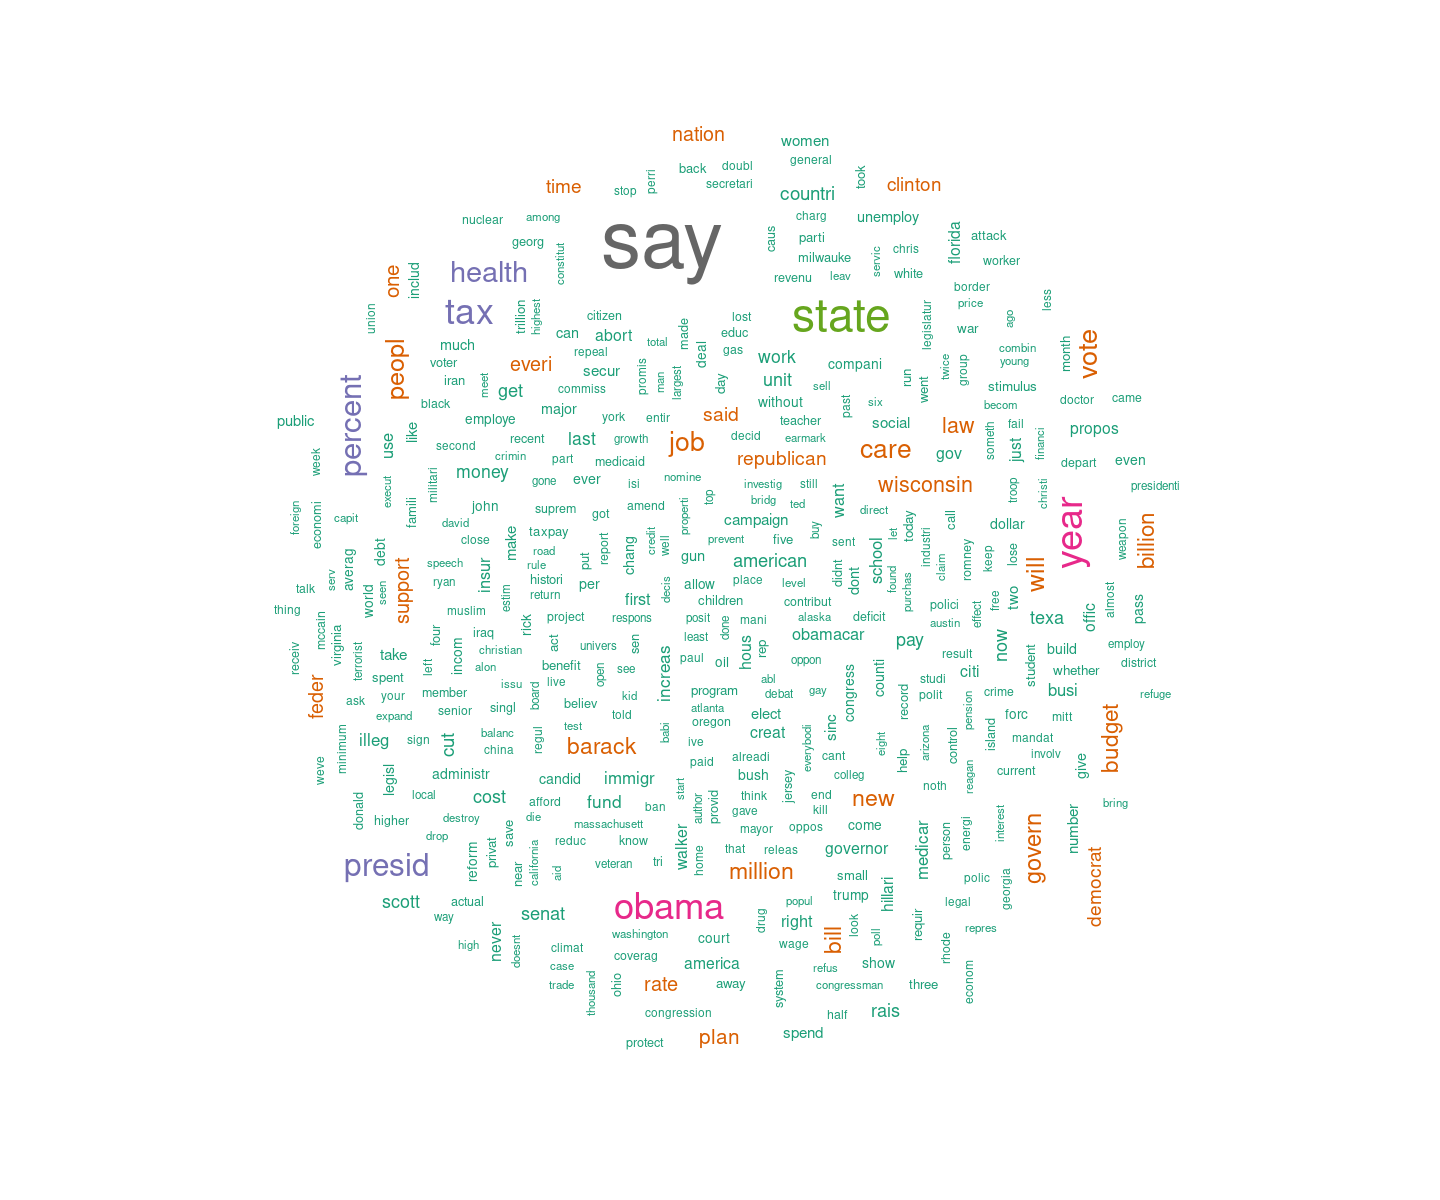

In [17]:
options(repr.plot.width=12, repr.plot.height =10)  #changing size of plots

df_fake <- subset(df,Labels == 1)
df_true <- subset(df,Labels == 5)

#############################################################################################
df_true$Text = as.character(df_true$Text)
df_true <- VCorpus(VectorSource(df_true$Text))
df_true <- tm_map(df_true ,content_transformer(tolower)) #converting to lower case letters
df_true <- tm_map(df_true ,removeNumbers)              #removing numbers
df_true <- tm_map(df_true ,removeWords,stopwords())    #remvoing stop words
df_true <- tm_map(df_true ,removePunctuation)          #removing punctuation
df_true <- tm_map(df_true ,stemDocument)
df_true <- tm_map(df_true ,stripWhitespace)#removing spaces after doing above process

df_fake$Text = as.character(df_fake$Text)
df_fake <- VCorpus(VectorSource(df_fake$Text))
df_fake <- tm_map(df_fake ,content_transformer(tolower)) #converting to lower case letters
df_fake <- tm_map(df_fake ,removeNumbers)              #removing numbers
df_fake <- tm_map(df_fake ,removeWords,stopwords())    #remvoing stop words
df_fake <- tm_map(df_fake ,removePunctuation)          #removing punctuation
df_fake <- tm_map(df_fake ,stemDocument)
df_fake <- tm_map(df_fake ,stripWhitespace)#removing spaces after doing above process
#############################################################################################

wordcloud(df_fake,min.freq = 10,,colors=brewer.pal(8, "Dark2"), rot.per=0.35) #max.words is most common words

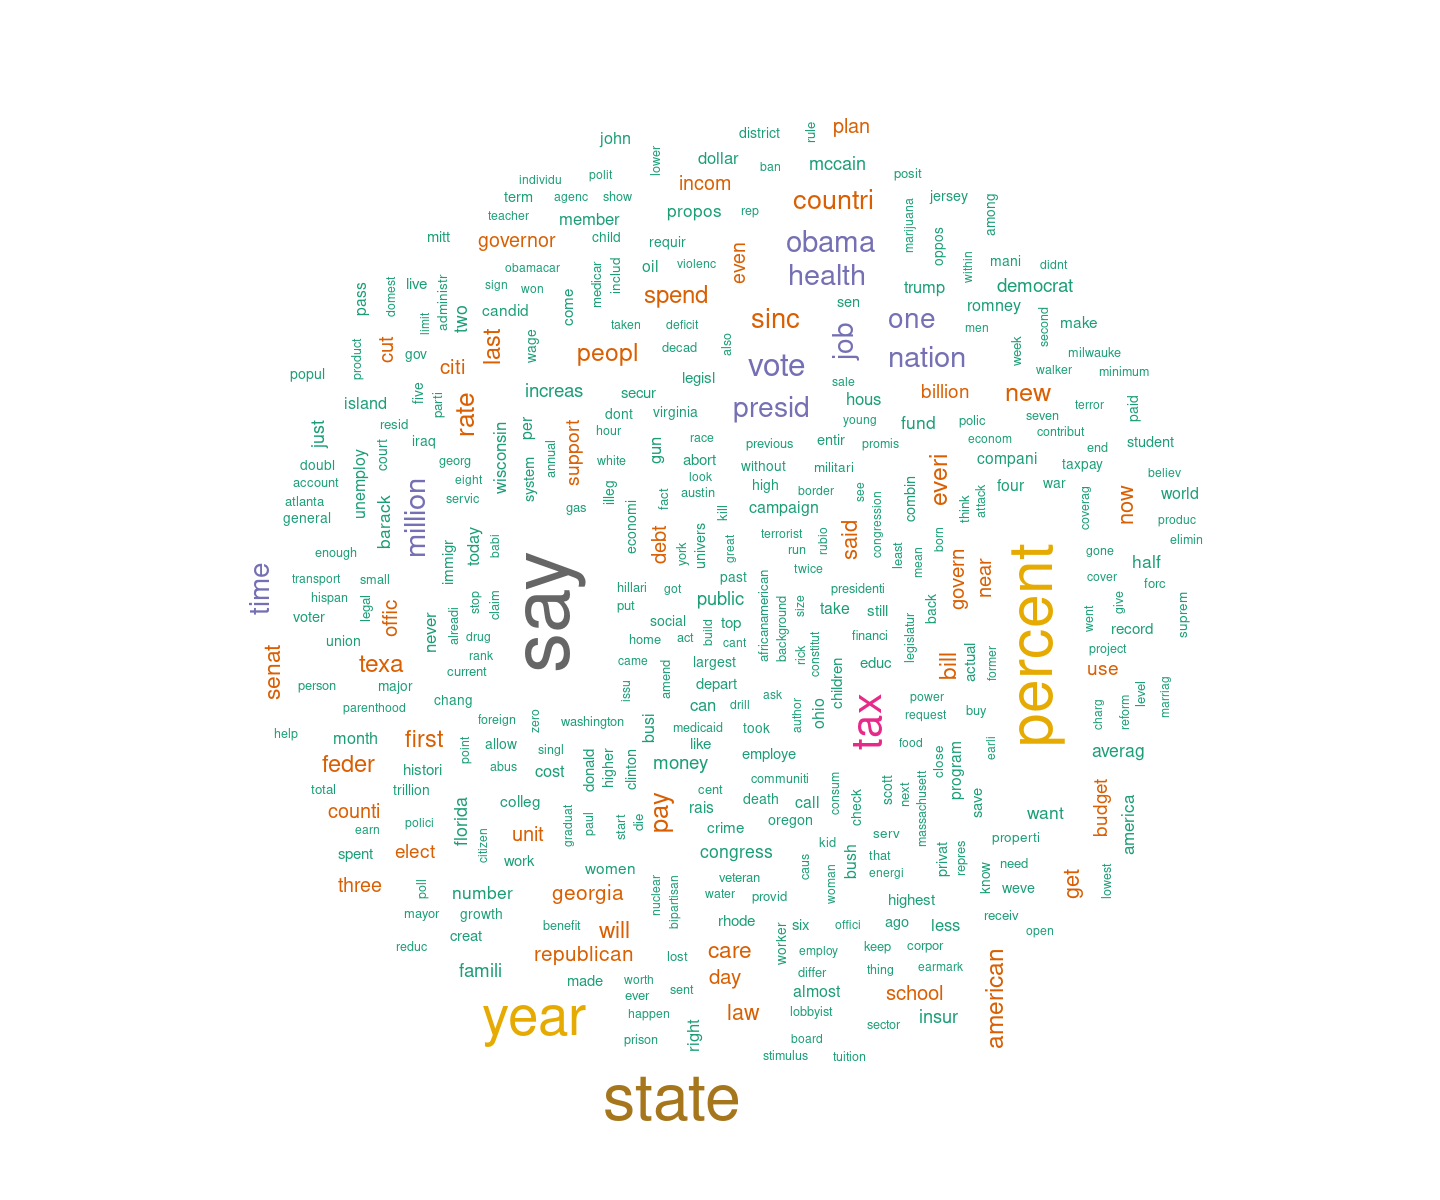

In [18]:
wordcloud(df_true,min.freq = 10,,colors=brewer.pal(8, "Dark2"), rot.per=0.35)

## Splitting into Train and Test <a class="anchor" id="splitting"></a>

In [74]:
test_ratio <- 0.15
SEED       <- 5

X   <- data.frame(as.matrix(df_dtm), stringsAsFactors=FALSE)
Y   <- df$Labels

set.seed(SEED)
test_size  <- as.integer(nrow(X)* test_ratio)
train_size <- nrow(X) - test_size

test_index <- sample(seq(1:nrow(X)), test_size)

X_test    <- X[test_index, ]         #reading the features from the document term matrix
Y_test    <- Y[test_index  ]         #reading the labels from the initial dataframe

X_train   <- X[! seq(1:nrow(X)) %in% test_index, ]
Y_train   <- Y[! seq(1:nrow(X)) %in% test_index  ]

X_val     <- X_train[1: (as.integer(nrow(X_train) * 0.18)),]
Y_val     <- Y_train[1: (as.integer(nrow(X_train) * 0.18)) ]

X_train   <- X_train[((as.integer(nrow(X_train)   * 0.18))+1) : nrow(X_train) ,  ] 
Y_train   <- Y_train[((as.integer(length(Y_train) * 0.18))+1) : length(Y_train)  ]

cat("Train Set Size:", nrow(X_train))
cat("\nTest  Set Size:", length(Y_test))
cat("\nValidation Set Size:", length(Y_val))
cat("\nThe sum of Samples:", sum(nrow(X_train), length(Y_test), length(Y_val)))

Train Set Size: 2560
Test  Set Size: 550
Validation Set Size: 561
The sum of Samples: 3671

# Train <a class="anchor" id="train"></a>

In [20]:
head(X_train)

,abbott,abil,abl,abolish,abort,absolut,abus,accept,access,accid,⋯,yearold,yet,york,you,young,your,youth,youv,zero,zone
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1849,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1850,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1851,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1852,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1853,0,0,0,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1854,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [21]:
head(cbind(X_train, Y_train))

,abbott,abil,abl,abolish,abort,absolut,abus,accept,access,accid,⋯,yet,york,you,young,your,youth,youv,zero,zone,Y_train
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1849,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1850,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2
1851,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2
1852,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2
1853,0,0,0,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
1854,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1


In [22]:
df_count <- aggregate(.~Y_train, cbind(X_train, Y_train), sum) #grouping by labels and counting the frequency
df_count

Y_train,abbott,abil,abl,abolish,abort,absolut,abus,accept,access,⋯,yearold,yet,york,you,young,your,youth,youv,zero,zone
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,3,2,7,2,19,1,3,4,6,⋯,3,7,9,3,2,8,2,0,4,1
1,2,4,6,4,22,2,3,5,2,⋯,2,2,8,2,5,12,1,1,3,0
2,5,2,3,0,21,1,1,4,9,⋯,0,7,6,3,12,8,3,2,6,5
3,3,5,10,0,8,3,1,6,5,⋯,2,5,10,0,6,9,3,5,4,0
4,0,0,1,1,6,3,0,3,2,⋯,1,2,3,1,0,0,0,0,4,2
5,0,0,3,0,18,2,8,4,5,⋯,1,3,11,2,6,4,1,4,6,0


In [23]:
df_count <- df_count + 1 #adding one to all the counts
df_count

Y_train,abbott,abil,abl,abolish,abort,absolut,abus,accept,access,⋯,yearold,yet,york,you,young,your,youth,youv,zero,zone
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4,3,8,3,20,2,4,5,7,⋯,4,8,10,4,3,9,3,1,5,2
2,3,5,7,5,23,3,4,6,3,⋯,3,3,9,3,6,13,2,2,4,1
3,6,3,4,1,22,2,2,5,10,⋯,1,8,7,4,13,9,4,3,7,6
4,4,6,11,1,9,4,2,7,6,⋯,3,6,11,1,7,10,4,6,5,1
5,1,1,2,2,7,4,1,4,3,⋯,2,3,4,2,1,1,1,1,5,3
6,1,1,4,1,19,3,9,5,6,⋯,2,4,12,3,7,5,2,5,7,1


In [24]:
df_count$Y_train   <- NULL
df_count$total.num <- rowSums(df_count)
df_count <- cbind(label.list, df_count)
colnames(df_count)[1] <- "Label"
df_count

Label,abbott,abil,abl,abolish,abort,absolut,abus,accept,access,⋯,yet,york,you,young,your,youth,youv,zero,zone,total.num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,4,3,8,3,20,2,4,5,7,⋯,8,10,4,3,9,3,1,5,2,12263
1,3,5,7,5,23,3,4,6,3,⋯,3,9,3,6,13,2,2,4,1,13535
2,6,3,4,1,22,2,2,5,10,⋯,8,7,4,13,9,4,3,7,6,15537
3,4,6,11,1,9,4,2,7,6,⋯,6,11,1,7,10,4,6,5,1,13951
4,1,1,2,2,7,4,1,4,3,⋯,3,4,2,1,1,1,1,5,3,6564
5,1,1,4,1,19,3,9,5,6,⋯,4,12,3,7,5,2,5,7,1,12116


In [25]:
label.density          <- hm$density[hm$density >0]
df_count$label.density <- label.density/2
no.col <- ncol(df_count) -2
df_count

Label,abbott,abil,abl,abolish,abort,absolut,abus,accept,access,⋯,york,you,young,your,youth,youv,zero,zone,total.num,label.density
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,4,3,8,3,20,2,4,5,7,⋯,10,4,3,9,3,1,5,2,12263,0.16152344
1,3,5,7,5,23,3,4,6,3,⋯,9,3,6,13,2,2,4,1,13535,0.19482422
2,6,3,4,1,22,2,2,5,10,⋯,7,4,13,9,4,3,7,6,15537,0.20644531
3,4,6,11,1,9,4,2,7,6,⋯,11,1,7,10,4,6,5,1,13951,0.19160156
4,1,1,2,2,7,4,1,4,3,⋯,4,2,1,1,1,1,5,3,6564,0.08193359
5,1,1,4,1,19,3,9,5,6,⋯,12,3,7,5,2,5,7,1,12116,0.16367187


In [26]:
for (i in 1:length(label.list))
    {df_count[i,2:no.col]  <- df_count[i, 2: no.col]/df_count$total.num[i]} #loop on 5 indexes
nbc <- df_count
nbc

Label,abbott,abil,abl,abolish,abort,absolut,abus,accept,access,⋯,york,you,young,your,youth,youv,zero,zone,total.num,label.density
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,3.261845e-04,2.446383e-04,0.0006523689,2.446383e-04,0.001630922,0.0001630922,0.0003261845,0.0004077306,0.0005708228,⋯,0.0008154611,3.261845e-04,0.0002446383,0.0007339150,0.0002446383,8.154611e-05,0.0004077306,1.630922e-04,12263,0.16152344
1,2.216476e-04,3.694126e-04,0.0005171777,3.694126e-04,0.001699298,0.0002216476,0.0002955301,0.0004432952,0.0002216476,⋯,0.0006649427,2.216476e-04,0.0004432952,0.0009604728,0.0001477651,1.477651e-04,0.0002955301,7.388253e-05,13535,0.19482422
2,3.861749e-04,1.930875e-04,0.0002574500,6.436249e-05,0.001415975,0.0001287250,0.0001287250,0.0003218124,0.0006436249,⋯,0.0004505374,2.574500e-04,0.0008367124,0.0005792624,0.0002574500,1.930875e-04,0.0004505374,3.861749e-04,15537,0.20644531
3,2.867178e-04,4.300767e-04,0.0007884739,7.167945e-05,0.000645115,0.0002867178,0.0001433589,0.0005017561,0.0004300767,⋯,0.0007884739,7.167945e-05,0.0005017561,0.0007167945,0.0002867178,4.300767e-04,0.0003583972,7.167945e-05,13951,0.19160156
4,1.523461e-04,1.523461e-04,0.0003046923,3.046923e-04,0.001066423,0.0006093845,0.0001523461,0.0006093845,0.0004570384,⋯,0.0006093845,3.046923e-04,0.0001523461,0.0001523461,0.0001523461,1.523461e-04,0.0007617307,4.570384e-04,6564,0.08193359
5,8.253549e-05,8.253549e-05,0.0003301420,8.253549e-05,0.001568174,0.0002476065,0.0007428194,0.0004126775,0.0004952129,⋯,0.0009904259,2.476065e-04,0.0005777484,0.0004126775,0.0001650710,4.126775e-04,0.0005777484,8.253549e-05,12116,0.16367187


## Prediction <a class="anchor" id="pred"></a>

In [27]:
cat("words matching:", all(colnames(nbc[2:as.numeric(ncol(nbc)-2)]) == colnames(X_test)))

words matching: TRUE

In [28]:
head(X_test)

,abbott,abil,abl,abolish,abort,absolut,abus,accept,access,accid,⋯,yearold,yet,york,you,young,your,youth,youv,zero,zone
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2255,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6859,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1833,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3797,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
7239,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1527,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [30]:
df.one.func <- function(x, output){
    prob.finder      <- function(x, ouput){return(prod(x[2:length(x)]))}
    df.one           <<- nbc[, c(1, ncol(nbc), which(x == 1) + 1)]
    df.final         <<- cbind(df.one, Label.Prob = apply(df.one, 1, prob.finder))
    predicted_label  <- df.final$Label[which(df.final$Label.Prob == max(df.final$Label.Prob))]
    return(predicted_label)}

X_test_all <- cbind(X_test, predicted_label= apply(X_test ,1,df.one.func))
Y_pred     <- X_test_all$predicted_label

ERROR: Error in x[, c(which(x > 0))]: incorrect number of dimensions


In [44]:
head(df.final)

Label,label.density,avoid,bill,financ,florida,give,gov,law,offici,person,public,rick,scott,sign,way,Label.Prob
0,0.16152344,0.0001630922,0.004648129,4.077306e-04,0.002364837,0.0014678301,0.001957107,0.004240398,0.0009785534,0.0009785534,0.003017206,0.0012231917,0.002364837,0.0010600995,0.0004892767,6.234324e-42
1,0.19482422,0.0002216476,0.005097894,2.216476e-04,0.002142593,0.0018470632,0.002585888,0.004063539,0.0004432952,0.0010343554,0.001994828,0.0015515331,0.003546361,0.0008865903,0.0005910602,5.351339e-42
2,0.20644531,0.0003861749,0.004312287,3.218124e-04,0.002896312,0.0010941623,0.001609062,0.003539937,0.0003861749,0.0007723499,0.002510137,0.0016090622,0.001995237,0.0009010749,0.0007723499,3.340665e-42
3,0.19160156,0.0001433589,0.004157408,7.167945e-05,0.002723819,0.0010035123,0.001290230,0.003225575,0.0002867178,0.0015052684,0.002150383,0.0014335890,0.001433589,0.0009318328,0.0005734356,9.490144e-44
4,0.08193359,0.0001523461,0.004570384,4.570384e-04,0.001828154,0.0007617307,0.002589884,0.003046923,0.0006093845,0.0010664229,0.001371115,0.0019804997,0.003351615,0.0004570384,0.0004570384,3.539841e-43
5,0.16367187,0.0002476065,0.003549026,4.126775e-04,0.002393529,0.0007428194,0.001072961,0.003136349,0.0006602839,0.0008253549,0.002393529,0.0008253549,0.001072961,0.0005777484,0.0005777484,1.369301e-43


In [67]:
head(X_test_all)

,abbott,abil,abl,abolish,abort,absolut,abus,accept,access,accid,...,yet,york,you,young,your,youth,youv,zero,zone,predicted_label
2255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [52]:
score <- function(Y_test, Y_pred){length(Y_test[Y_test == Y_pred])/length(Y_test)} 

In [59]:
cat('The Test Accuracy', round(score(Y_test, Y_pred), 3)) 

The Test Accuracy 0.206

## Now Let's Wrap Up Everything Together! <a class="anchor" id="Comp"></a>

## Cleaning and Filtering the Dataset [Compact Version] <a class="anchor" id="clean"></a>

In [53]:
df_cleaner <- function(df, threshold, minfreq, binom){
    
    df_corp <- VCorpus(VectorSource(as.character(df$Text)))
    df_corp <- tm_map(df_corp ,stripWhitespace)                #removing white spaces
    df_dtm <-  DocumentTermMatrix(df_corp,
                               control = list(tolower = TRUE,
                                            removeNumbers = TRUE,
                                            stopwords = TRUE,
                                            removePunctuation = TRUE,
                                            stemming = TRUE))
if (binom==TRUE){

    #finding frequent terms for each label:
    fake_freq <- findFreqTerms(df_dtm [which(df$Labels==1), ],minfreq)
    true_freq <- findFreqTerms(df_dtm [which(df$Labels==5), ],minfreq)

    simil_words <- intersect(fake_freq,true_freq)

    #finding the frequency of each word
    frequency_true    <-  slam::col_sums(df_dtm[which(df$Labels==5), ])
    frequency_fake    <-  slam::col_sums(df_dtm[which(df$Labels==1), ])

    frequency_true    <-  frequency_true[frequency_true >= minfreq]
    frequency_fake    <-  frequency_fake[frequency_fake >= minfreq]

    frequency_df_true <-  data.frame(words  = names(frequency_true), freq.true = frequency_true , row.names = NULL)
    frequency_df_fake <-  data.frame(words  = names(frequency_fake), freq.fake = frequency_fake , row.names = NULL)

    frequency_df_true <-  frequency_df_true[order(-frequency_df_true$freq),]
    frequency_df_fake <-  frequency_df_fake[order(-frequency_df_fake$freq),]

    # cat('words among true the news:')
    # head(frequency_df_true)
    # cat('words among the fake news:')
    # head(frequency_df_fake)

    simil_true <- frequency_df_true[frequency_df_true$words %in% simil_words, ]
    simil_fake <- frequency_df_fake[frequency_df_fake$words %in% simil_words, ]

    all_simil  <- merge(simil_true, simil_fake, by="words")

    diff.func <- function(x, ouput){
      A = as.numeric(x[2])
      B = as.numeric(x[3])
      rate <- 1- (min(A,B)/max(A,B))
      return(rate)}
    
    all_simil <-cbind(all_simil, diff.rate= apply(all_simil ,1,diff.func))
    # head(all_simil[order(-all_simil$diff.rate), ])
    Word_List <- all_simil[all_simil$diff.rate < threshold, ]$words
    # head(all_simil[all_simil$diff.rate < threshold, ])

    
    df_corp <- VCorpus(VectorSource(as.character(df$Text)))
    df_corp <- tm_map(df_corp , stripWhitespace)                #removing white spaces
    df_corp <- tm_map(df_corp , removeWords, Word_List)        #removing based on the Word List obtained via thresholding
    df_dtm  <- DocumentTermMatrix(df_corp,
                                   control = list(tolower = TRUE,
                                                removeNumbers = TRUE,
                                                stopwords = TRUE,
                                                removePunctuation = TRUE,
                                                stemming = TRUE))
    }
    
freq_words <-  findFreqTerms(df_dtm,minfreq)  #minfreq is already defined## Threshold on frequecny of the word
df_dtm     <-  df_dtm[,freq_words]      
 
return(df_dtm)
# options(repr.plot.width=4, repr.plot.height =3)  #changing size of plots
# hist(all_simil$diff.rate)   
}

## Splitting Data into Train/Test Sets [Compact Version] <a class="anchor" id="split"></a>

In [54]:
train_test_splitter <- function(df_dtm, df, test_ratio, SEED){

    X   <- data.frame(as.matrix(df_dtm), stringsAsFactors=FALSE)
    Y   <- df$Labels
    
    set.seed(SEED)
    test_size  <- as.integer(nrow(X)* test_ratio)
    train_size <- nrow(X) - test_size

    test_index <- sample(seq(1:nrow(X)), test_size)

    X_test    <<- X[test_index, ]         #reading the features from the document term matrix
    Y_test    <<- Y[test_index  ]     #reading the labels from the initial dataframe

    X_train   <<- X[! seq(1:nrow(X)) %in% test_index, ]
    Y_train   <<- Y[! seq(1:nrow(X)) %in% test_index  ]
    
    X_val     <<- X_train[1: (as.integer(nrow(X_train) * 0.18)),]
    Y_val     <<- Y_train[1: (as.integer(nrow(X_train) * 0.18)) ]
    
    
    X_train   <<- X_train[((as.integer(nrow(X_train)   * 0.18))+1) : nrow(X_train) ,  ] 
    Y_train   <<- Y_train[((as.integer(length(Y_train) * 0.18))+1) : length(Y_train)  ]
    
    cat("Train Set Size:", nrow(X_train))
    cat("\nTest  Set Size:", length(Y_test))
    cat("\nValidation Set Size:", length(Y_val))
#   cat("\nThe sum of Samples:", sum(nrow(X_train), length(Y_test), length(Y_val)))
}

## Building the Classifer <a class="anchor" id="build"></a>

In [55]:
Train <- function(X_train, Y_train){
    df_count <- aggregate(.~Y_train, cbind(X_train, Y_train), sum) #grouping by labels and counting the frequency
    df_count <- df_count + 1 #adding one to all the counts
    df_count$Y_train <- NULL
    df_count$total.num <- rowSums(df_count)
    df_count <- cbind(label.list, df_count)
    colnames(df_count)[1] <- "Label"
    label.density <- hm$density[hm$density >0]
    df_count$label.density <- label.density/2 ;no.col <- ncol(df_count) -2
    for (i in 1:length(label.list)){df_count[i,2:no.col]  <- df_count[i, 2: no.col]/df_count$total.num[i]} #loop on 5 indexes
    return(df_count)}

Predict <- function(nbc, X_test){
#     cat("words matching:", all(colnames(nbc[2:as.numeric(ncol(nbc)-2)]) == colnames(X_test)))
    df.one.func <- function(x, output){
        df.one <- nbc[, c(1, ncol(nbc), which(x == 1) + 1)]
        prob.finder <- function(x, ouput){return(prod(x[2:length(x)]))}
        df.final <-cbind(df.one, Label.Prob = apply(df.one, 1, prob.finder))
        predicted_label <- df.final$Label[which(df.final$Label.Prob == max(df.final$Label.Prob))]
        return(predicted_label)}
    X_test_all <-cbind(X_test, predicted_label= apply(X_test ,1,df.one.func))
    return(X_test_all$predicted_label)}

In [56]:
score <- function(Y_train, Y_pred){length(Y_train[Y_train == Y_pred])/length(Y_train)} 

## Now we repeat the previous procedure using functions [Multinomial Classification]  <a class="anchor" id="func"></a>

### Reading the Data

In [110]:
#=======filtering the dataset keeping just the label 5:true and 1:false========#

label.list <- c(0,1,2,3,4,5)   #the labels:0,1,2,3,4,5

#==============================================================================#

options(repr.plot.width=5, repr.plot.height =3)    #changing size of plots
df <- DF[DF$Labels %in% label.list, ] #the labels:0,1,2,3,4,5
cat("filtered dataset size:", nrow(df))
hm <- hist(df$Labels, plot = FALSE)  #saving for later use in the predictor function

filtered dataset size: 10240

### Preprocessing on Data

In [111]:
df_dtm <- df_cleaner(df, threshold= 0, minfreq = 10, binom = FALSE)

### Splitting Dataset into Train/Test Set

In [112]:
train_test_splitter(df_dtm, df, test_ratio=0.15, SEED= 5)

Train Set Size: 7138
Test  Set Size: 1536
Validation Set Size: 1566

### Training the Model

In [86]:
nbc <- Train(X_train, Y_train)

### Predicting the Labels on Test Set

In [89]:
Y_pred_train <- Predict(nbc, X_train)
Y_pred       <- Predict(nbc, X_test)

### Accuracy of the Prediction

In [92]:
cat("Train accuracy:",     score(Y_train, Y_pred_train))
cat("\nTest  accuracy:",   score(Y_test, Y_pred))

Train accuracy: 0.4766299
Test  accuracy: 0.2016602

## The Accuracy so low?! What's the problem? Are we doing something wrong in the code?

## Let's See What is Result using Libraries:  <a class="anchor" id="library"></a>

### NaiveBayes classifer from e1071 library <a class="anchor" id="e1071"></a>

[Add the "yes" "no" part or no!]

In [113]:
NBC <- naiveBayes(X_train, Y_train) #Navive Bayesian Classifer

Y_train_pred <- predict(NBC, X_train)
Y_pred       <- predict(NBC, X_test)

table_train  <- table(Y_train_pred ,Y_train)
table_train

cat("Train accuracy:",     score(Y_train, Y_pred_train))
cat("\nTest  accuracy:",   score(Y_test, Y_pred))

            Y_train
Y_train_pred    0    1    2    3    4    5
           0    0    0    1    1    0    0
           1    0    0    1    0    0    0
           2    0    0    0    0    0    0
           3    1    1    0    0    0    1
           4 1158 1392 1474 1351  583 1166
           5    1    1    3    1    0    2

Warning message in Y_train == Y_pred:
"longer object length is not a multiple of shorter object length"

Train accuracy: 0.1849257
Test  accuracy: 0.08333333

### NaiveBayes classifer from fastnaive library <a class="anchor" id="fast"></a>

In [ ]:
fast.NBC     <- fnb.multinomial(X_train, Y_train)

Y_train_pred <- predict(fast.NBC, X_train)
Y_pred       <- predict(fast.NBC, X_test)

cat("Train accuracy:",     score(Y_train, Y_pred_train))
cat("\nTest  accuracy:",   score(Y_test, Y_pred))

## Also Not Good Accuracies with other Libraries

## Let's Consider a Simpler Case for a moment, A case with only true or false Labels:

# Binomial Classification <a class="anchor" id="binom"></a>

In [47]:
DF <- read.csv("./data/train.csv")

In [57]:
#=======filtering the dataset keeping just the label 5:true and 1:false========#

label.list <- c(1,5)   #the labels:0,1,2,3,4,5

#==============================================================================#

options(repr.plot.width=5, repr.plot.height =3)    #changing size of plots
df <- DF[DF$Labels %in% label.list, ] #the labels:0,1,2,3,4,5
cat("filtered dataset size:", nrow(df))
hm <- hist(df$Labels, plot = FALSE)  #saving for later use in the predictor function

filtered dataset size: 3671

In [58]:
df_dtm <- df_cleaner(df, threshold= 0, minfreq = 10, binom = FALSE)
train_test_splitter(df_dtm, df, test_ratio=0.15, SEED= 5)
nbc <- Train(X_train, Y_train)
Y_pred_train <- Predict(nbc, X_train)
Y_pred       <- Predict(nbc, X_test)

Train Set Size: 2560
Test  Set Size: 550
Validation Set Size: 561

In [59]:
cat("Train accuracy:",     score(Y_train, Y_pred_train))
cat("\nTest  accuracy:",   score(Y_test, Y_pred))

Train accuracy: 0.7144531
Test  accuracy: 0.5763636

### A Survey on The Terms and Words of the Dataset [just for the binomial case]

In [60]:
minfreq   <- 10 

In [61]:
#finding frequent terms for each label:
fake_freq <- findFreqTerms(df_dtm [which(df$Labels==1), ], minfreq)
true_freq <- findFreqTerms(df_dtm [which(df$Labels==5), ], minfreq)

In [62]:
simil_words <- intersect(fake_freq,true_freq)

In [63]:
#finding the frequency of each word
frequency_true    <-  slam::col_sums(df_dtm[which(df$Labels==5), ])
frequency_fake    <-  slam::col_sums(df_dtm[which(df$Labels==1), ])

In [64]:
frequency_true    <-  frequency_true[frequency_true >= minfreq]
frequency_fake    <-  frequency_fake[frequency_fake >= minfreq]

In [65]:
frequency_df_true <-  data.frame(words  = names(frequency_true), freq.true = frequency_true , row.names = NULL)
frequency_df_fake <-  data.frame(words  = names(frequency_fake), freq.fake = frequency_fake , row.names = NULL)

In [66]:
frequency_df_true <-  frequency_df_true[order(-frequency_df_true$freq),]
frequency_df_fake <-  frequency_df_fake[order(-frequency_df_fake$freq),]

In [67]:
cat('words among the true news:')
head(frequency_df_true)
cat('words among the fake news:')
head(frequency_df_fake)

words among the true news:

,words,freq.true
,<fct>,<dbl>
294,say,338
318,state,256
244,percent,243
383,year,216
328,tax,152
360,vote,104


words among the fake news:

,words,freq.fake
,<fct>,<dbl>
324,say,504
350,state,254
418,year,201
246,obama,190
361,tax,185
277,presid,155


In [68]:
simil_true <- frequency_df_true[frequency_df_true$words %in% simil_words, ]
simil_fake <- frequency_df_fake[frequency_df_fake$words %in% simil_words, ]
all_simil  <- merge(simil_true, simil_fake, by="words")
head(all_simil)

,words,freq.true,freq.fake
,<fct>,<dbl>,<dbl>
1,abort,24,42
2,act,13,24
3,actual,25,19
4,administr,17,29
5,ago,21,11
6,allow,19,26


In [69]:
diff.func <- function(x, ouput){
      A = as.numeric(x[2])
      B = as.numeric(x[3])
      rate <- 1- (min(A,B)/max(A,B))
      return(rate)}

In [70]:
all_simil <-cbind(all_simil, diff.rate= apply(all_simil ,1,diff.func))
# head(all_simil[order(-all_simil$diff.rate), ])
head(all_simil)

,words,freq.true,freq.fake,diff.rate
,<fct>,<dbl>,<dbl>,<dbl>
1,abort,24,42,0.4285714
2,act,13,24,0.4583333
3,actual,25,19,0.2400000
4,administr,17,29,0.4137931
5,ago,21,11,0.4761905
6,allow,19,26,0.2692308


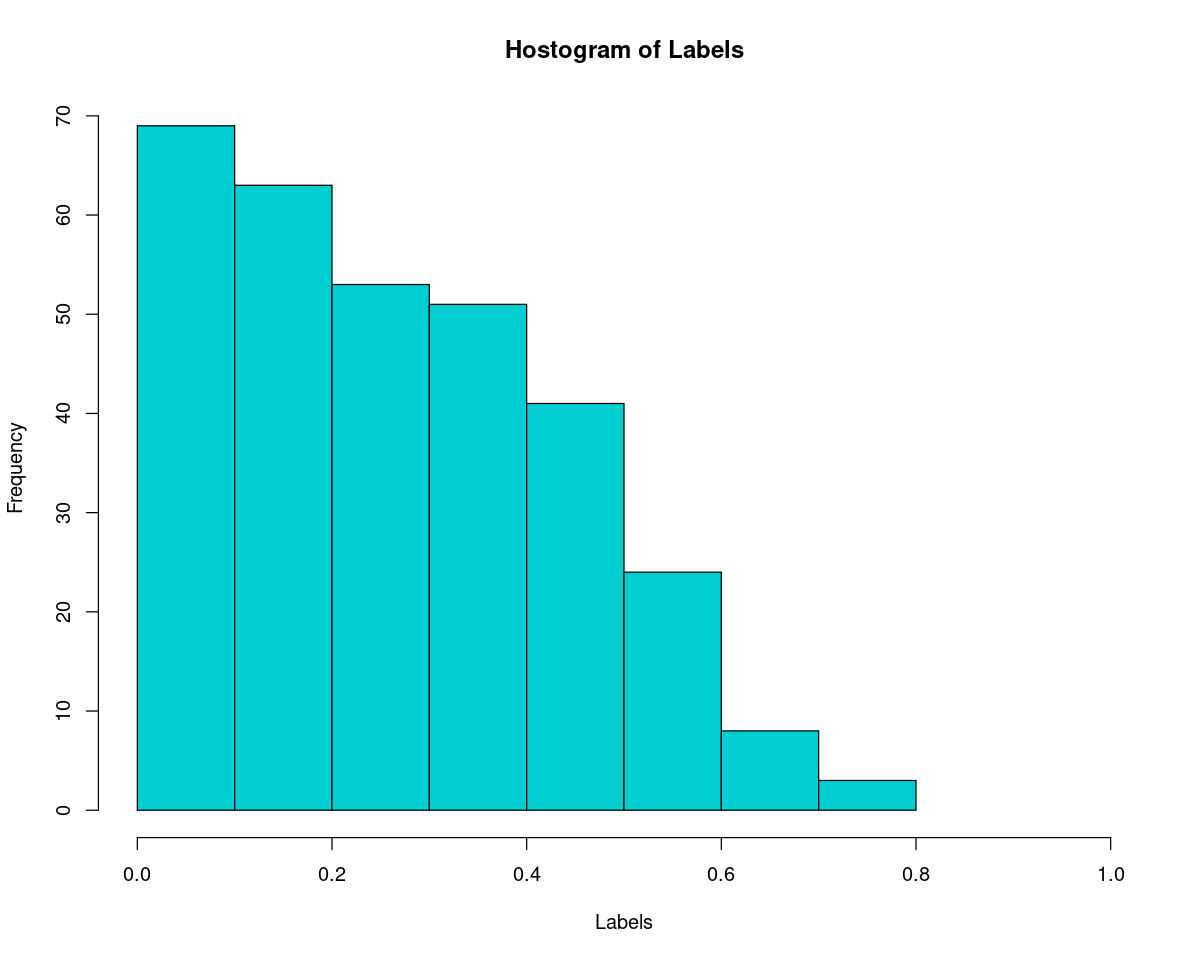

In [73]:
options(repr.plot.width=10, repr.plot.height =8)    #changing size of plots

hist(all_simil$diff.rate, main='Hostogram of Labels',col='darkturquoise' , xlab='Labels', ,xlim=seq(0,1))

here we can add an abline for the threshold

In [153]:
threshold <- 0.3

In [158]:
Word_List <- all_simil[all_simil$diff.rate < threshold, ]$words
# head(all_simil[all_simil$diff.rate < threshold, ])

In [ ]:
df_corp <- VCorpus(VectorSource(as.character(df$Text)))
df_corp <- tm_map(df_corp , stripWhitespace)                #removing white spaces

In [ ]:
df_corp <- tm_map(df_corp , removeWords, Word_List)        #removing based on the Word List obtained via thresholding

In [ ]:
df_dtm  <- DocumentTermMatrix(df_corp,
                               control = list(tolower = TRUE,
                                            removeNumbers = TRUE,
                                            stopwords = TRUE,
                                            removePunctuation = TRUE,
                                            stemming = TRUE))

### ...and the reuslt?

In [159]:
df_dtm <- df_cleaner(df, threshold= 0.3, minfreq = 10, binom = TRUE)
train_test_splitter(df_dtm, df, test_ratio=0.15, SEED= 5)
nbc <- Train(X_train, Y_train)
Y_pred_train <- Predict(nbc, X_train)
Y_pred       <- Predict(nbc, X_test)

Train Set Size: 2560
Test  Set Size: 550
Validation Set Size: 561

In [160]:
cat("Train accuracy:",     score(Y_train, Y_pred_train))
cat("\nTest  accuracy:",   score(Y_test, Y_pred))

Train accuracy: 0.7140625
Test  accuracy: 0.6181818

As we can see the train accuracy is the same but now the test accuracy seems to be little larger! Indeed a valid investigation of  the effect of thresholding should involve averaging over differnt seeds, but let's keep this parameter as a way to reduce the complexity of the model.

## Test on Larger Dataset

## Hyper Parameter Tuning (Multinomial Case)

The hyper paramter tuning of this part is done only on our model

In [166]:
minfreq.list   <- c(10, 15, 20, 25, 30)   #minfreq > 10

In [75]:
grid <- data.frame(matrix(ncol = 3, nrow = 0))
params <- c("min.frequecny", "train.acc", "val.acc")
colnames(grid) <- params

In [76]:
# for (minfreq in minfreq.list){
#     df_dtm <- df_cleaner(df_5, threshold=0, minfreq, binom = FALSE)
#     train.acc <- vector() ; val.acc  <- vector()
#     for (SEED in 1:10){
#         train_test_splitter(df_dtm, df_5, test_ratio = 0.15, SEED)
#         nbc <-Train(X_train, Y_train) #training process
#         train.acc <- append(train.acc, score(Y_train, Predict(nbc, X_train)))
#         val.acc  <- append(val.acc,  score(Y_val,  Predict(nbc, X_val )))
#         }

#     grid[nrow(grid) + 1,] = c(minfreq, mean(train.acc), mean(val.acc))
#     }

# write.csv(grid, "./data_res/gridsearch_multi.csv")

In [69]:
head(grid[order(-grid$val.acc),])

## Hyper Parameter Tuning (Binomial Cass)

In [30]:
minfreq.list   <- c(5, 10, 15, 20,   25)   #minfreq > 1
threshold.list <- c(0, 0.1,0.3, 0.5, 0.7)

In [31]:
grid <- data.frame(matrix(ncol = 4, nrow = 0))
params <- c("min.frequecny","threshold", "train.acc", "val.acc")
colnames(grid) <- params

In [32]:
# for (threshold in threshold.list){
#     for (minfreq in minfreq.list){
#         df_dtm <- df_cleaner(df_2, threshold, minfreq, binom = TRUE)
#         train.acc <- vector() ; val.acc  <- vector()
#         for (SEED in 1:10){
#             train_test_splitter(df_dtm, df_2, test_ratio = 0.15, SEED)
#             nbc <- Train(X_train, Y_train) #training process
#             train.acc <- append(train.acc, score(Y_train, Predict(nbc, X_train)))
#             val.acc  <- append(val.acc,  score(Y_val,  Predict(nbc, X_val )))
                 
#             }
        
#         grid[nrow(grid) + 1,] = c(minfreq,threshold, mean(train.acc), mean(val.acc))
#     }
# }

# write.csv(grid, "./data_res/gridsearch_binom.csv")

Train Set Size: 2560
Test  Set Size: 550
Validation Set Size: 561
The sum of Samples: 3671words matching: TRUEwords matching: TRUETrain Set Size: 2560
Test  Set Size: 550
Validation Set Size: 561
The sum of Samples: 3671words matching: TRUEwords matching: TRUETrain Set Size: 2560
Test  Set Size: 550
Validation Set Size: 561
The sum of Samples: 3671words matching: TRUEwords matching: TRUETrain Set Size: 2560
Test  Set Size: 550
Validation Set Size: 561
The sum of Samples: 3671words matching: TRUEwords matching: TRUETrain Set Size: 2560
Test  Set Size: 550
Validation Set Size: 561
The sum of Samples: 3671words matching: TRUEwords matching: TRUETrain Set Size: 2560
Test  Set Size: 550
Validation Set Size: 561
The sum of Samples: 3671words matching: TRUEwords matching: TRUETrain Set Size: 2560
Test  Set Size: 550
Validation Set Size: 561
The sum of Samples: 3671words matching: TRUEwords matching: TRUETrain Set Size: 2560
Test  Set Size: 550
Validation Set Size: 561
The sum of Samples: 3671

In [164]:
comp.time <- read.csv("./data_res/gridsearch_binom.csv")
head(comp.time)

X,min.frequecny,threshold,train.acc,val.acc
1,5,0.0,0.7557422,0.6265597
2,10,0.0,0.7182422,0.6411765
3,15,0.0,0.6916016,0.6415330
4,20,0.0,0.6760156,0.6508021
5,25,0.0,0.6683594,0.6547237
6,5,0.1,0.7582031,0.6269162


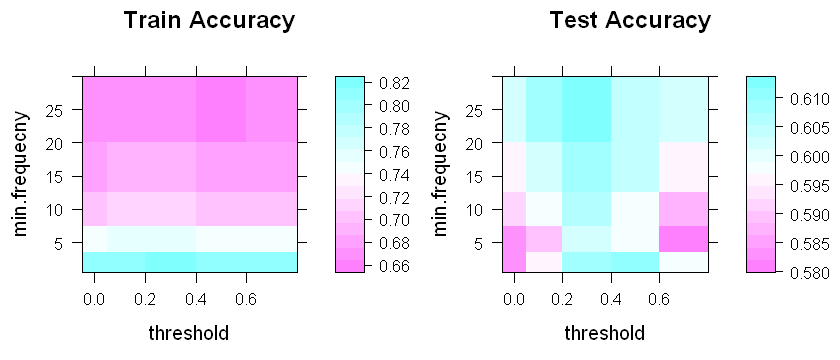

In [75]:
options(repr.plot.width=7, repr.plot.height =3)  #changing size of plots
train <- levelplot(train.acc ~ threshold*min.frequecny, data=comp.time, main= "Train Accuracy")  
val   <- levelplot(val.acc   ~ threshold*min.frequecny, data=comp.time,   main= "Validation Accuracy")  
grid.arrange(train, val ,ncol=2)

# Comparing the Accuracies

for two and five labels we have the best paramteres. for other number of lables like 3,4, and 5 we go with one parameter which is minfreq and use the best minfreq obtained from the multinomial gridsearch

In [10]:
best.minfreq   <- 20   #20 is the best minfreq both for binmoal and the multilabel cases 
best.threshold <- 0.3  #best for the binomial, not used for the multilabel case

In [11]:
df.acc <- data.frame(matrix(ncol = 7, nrow = 0))
params <- c("No.of.Labels",
            "Train.Acc.e1071", "Test.Acc.e1071","Train.Acc.fastnaive",
            "Test.Acc.fastnaive", "Train.Acc.Model", "Test.Acc.Model")

colnames(df.acc) <- params

In [12]:
Label_List <- list(c(1,5), c(1,4,5), c(1,2,4,5), c(0,1,2,4,5), c(0,1,2,3,4,5))


for (label.list in Label_List){
    binom <- FALSE ; best.threshold <- 0    #for multi-label cases, here best.threshold is dummy
    if (length(label.list) == 2) {binom = TRUE ; best.threshold <- 0.3} #for the binomial case
    
    df <- read.csv("./data/train.csv")
    df  <- df[df$Labels %in% label.list, ] 
    hm    <- hist(df$Labels, plot =FALSE)    
    df_dtm <- df_cleaner(df, threshold=best.threshold , minfreq=best.minfreq, binom )
    
    train.e10 <- vector() ; train.fastnaive <- vector(); train.model <- vector()
    test.e10  <- vector() ; test.fastnaive  <- vector(); test.model  <- vector()
    
    for (SEED in 1:5){

        #===========e1071============#
        train_test_splitter(df_dtm, df, 0.2, SEED)
        NBC <- naiveBayes(X_train, Y_train)
        train.e10 <- append(train.e10, score(Y_train, predict(NBC, X_train)))
        test.e10  <- append(test.e10,  score(Y_test,  predict(NBC, X_test )))    
        
        #==========fastnaive========#
        train_test_splitter(df_dtm, df, 0.2, SEED)
        fast_nbc <- fnb.multinomial(X_train, Y_train)
        train.fastnaive <- append(train.fastnaive, score(Y_train, predict(fast_nbc, X_train)))
        test.fastnaive  <- append(test.fastnaive,  score(Y_test,  predict(fast_nbc, X_test ))) 
        
        #==========model============#
        train_test_splitter(df_dtm, df, 0.2, SEED)
        nbc <- Train(X_train, Y_train) 
        train.model <- append(train.model, score(Y_train, Predict(nbc, X_train)))
        test.model  <- append(test.model,  score(Y_test,  Predict(nbc, X_test )))       
        
        }
    
    df.acc[nrow(df.acc) + 1,] <- c(length(label.list), 
                                  mean(train.e10), mean(test.e10),
                                  mean(train.fastnaive), mean(test.fastnaive),
                                  mean(train.model), mean(test.model)) 
   }


Train Set Size: 2409
Test  Set Size: 734
Validation Set Size: 528
The sum of Samples: 3671Train Set Size: 2409
Test  Set Size: 734
Validation Set Size: 528
The sum of Samples: 3671Train Set Size: 2409
Test  Set Size: 734
Validation Set Size: 528
The sum of Samples: 3671words matching: TRUEwords matching: TRUETrain Set Size: 2409
Test  Set Size: 734
Validation Set Size: 528
The sum of Samples: 3671Train Set Size: 2409
Test  Set Size: 734
Validation Set Size: 528
The sum of Samples: 3671Train Set Size: 2409
Test  Set Size: 734
Validation Set Size: 528
The sum of Samples: 3671words matching: TRUEwords matching: TRUETrain Set Size: 2409
Test  Set Size: 734
Validation Set Size: 528
The sum of Samples: 3671Train Set Size: 2409
Test  Set Size: 734
Validation Set Size: 528
The sum of Samples: 3671Train Set Size: 2409
Test  Set Size: 734
Validation Set Size: 528
The sum of Samples: 3671words matching: TRUEwords matching: TRUETrain Set Size: 2409
Test  Set Size: 734
Validation Set Size: 528
The 

In [ ]:
write.csv(df.acc, "./all_acc_new.csv")

In [14]:
df.acc

No.of.Labels,Train.Acc.e1071,Test.Acc.e1071,Train.Acc.fastnaive,Test.Acc.fastnaive,Train.Acc.Model,Test.Acc.Model
2,1.5,1.5,2.5,2.5,0.6833504,0.6062670
3,1.5,1.5,2.5,2.5,0.5989468,0.4828160
4,1.5,1.5,2.5,2.5,0.5025472,0.3474320
5,1.5,1.5,2.5,2.5,0.4520610,0.2788520
6,1.5,1.5,2.5,2.5,0.4193726,0.2355957


In [37]:
df.acc <- read.csv("./all_acc_new.csv")

In [38]:
df.acc

X,No.of.Labels,Train.Acc.e1071,Test.Acc.e1071,Train.Acc.fastnaive,Test.Acc.fastnaive,Train.Acc.Model,Test.Acc.Model
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,0.6699875,0.57874659,0.6919054,0.6160763,0.6798672,0.6087193
2,3,0.3993241,0.32483370,0.5981075,0.4796009,0.5835079,0.4762749
3,4,0.2401289,0.18293051,0.5075472,0.3395770,0.4948919,0.3429003
4,5,0.1595286,0.12471299,0.4592156,0.2657402,0.4437488,0.2673112
5,6,0.1027687,0.09052734,0.4279547,0.2215820,0.4100327,0.2234375


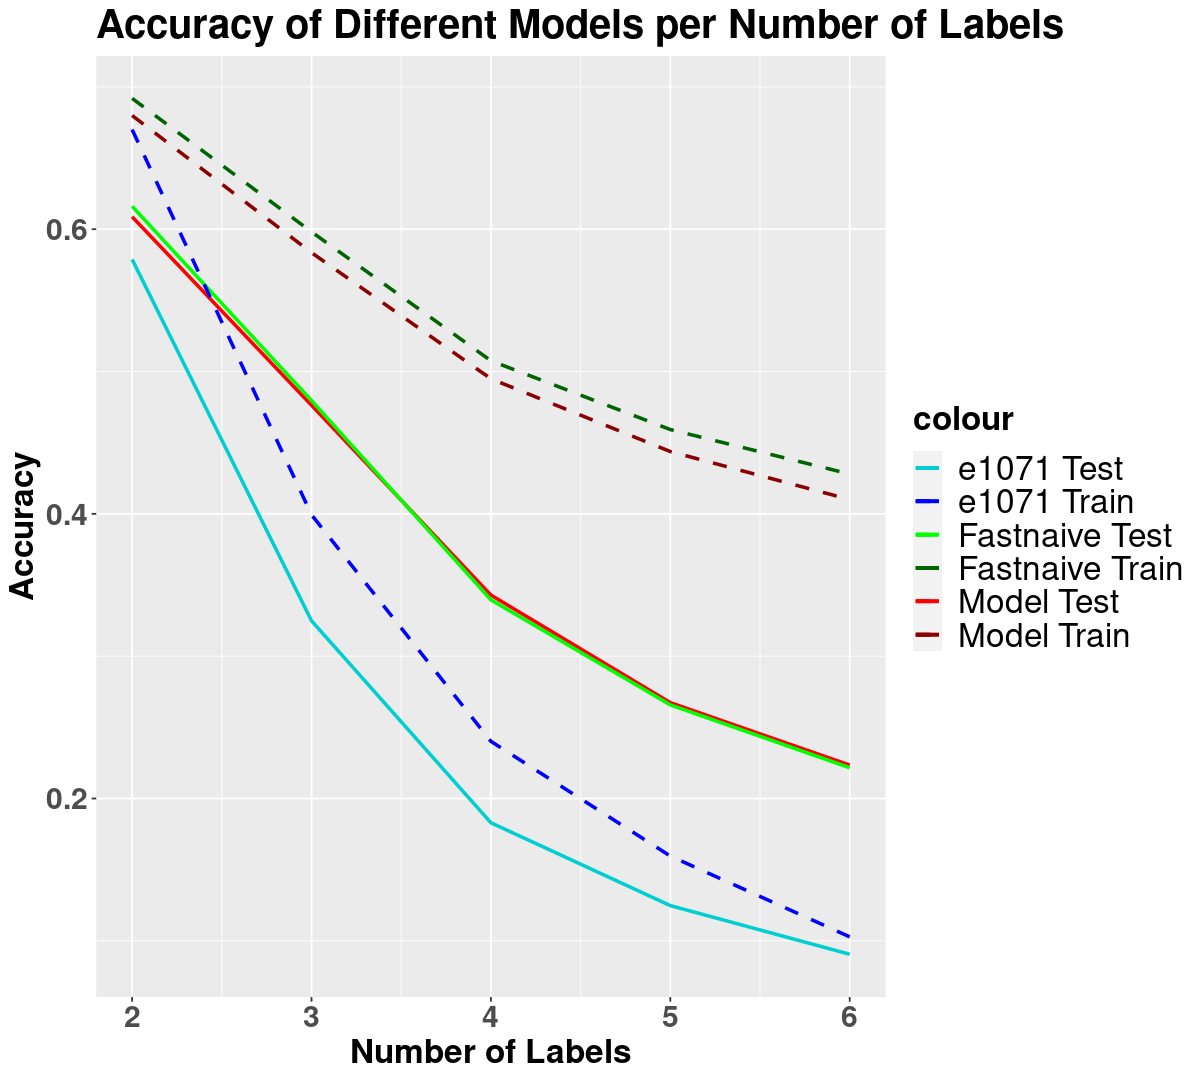

In [46]:
options(repr.plot.width=10, repr.plot.height =9)  #changing size of plots

ggplot(data = df.acc, aes(x = No.of.Labels)) +
  geom_line(aes(y = Test.Acc.Model, colour = "Model Test"),         lwd=1) + 
  geom_line(aes(y = Test.Acc.fastnaive, colour = "Fastnaive Test"), lwd=1) + 
  geom_line(aes(y = Test.Acc.e1071, colour = "e1071 Test"),         lwd=1) + 
  
  geom_line(aes(y = Train.Acc.Model, colour = "Model Train", ), linetype = "dashed",  lwd=1) + 
  geom_line(aes(y = Train.Acc.fastnaive, colour = "Fastnaive Train"),linetype = "dashed", lwd=1) + 
  geom_line(aes(y = Train.Acc.e1071, colour = "e1071 Train"),  linetype = "dashed",       lwd=1) + 

  labs(title = "Accuracy of Different Models per Number of Labels",
         x = "Number of Labels",
         y = "Accuracy") +scale_color_manual(values = c("darkturquoise", "blue", "green", "Darkgreen", "red",'Darkred' ))+
  theme(legend.text = element_text(size = 20),
      axis.text.y = element_text(face="bold", size=18),
      axis.text.x = element_text(face="bold", size=18),  
      axis.title.x = element_text(size = 20),
      axis.title.y = element_text(size = 20),
      title =element_text(size=20, face='bold'))

## Computation Time

In [ ]:
df_5 <- read.csv("./data/train.csv")
label.list <- c(0,1,2,3,4,5)   #the labels:0,1,2,3,4,5
df_5  <- df_5[df_5$Labels %in% label.list, ]
hm    <- hist(df_5$Labels, plot =FALSE)    
cat("dataset size:", nrow(df_5))

In [ ]:
comp.time <- data.frame(matrix(ncol = 7, nrow = 0))
params <- c("Dataset.Size",
            "Comp.Time.e1071 [s]", "Comp.Time.fastnaive [s]", "Comp.Time.model [s]", 
            "Test.Acc.e1071",    "Test.Acc.fastnaive", "Test.Acc.model")

colnames(comp.time) <- params

In [ ]:
N <- seq(1000, 10000, 1000)    # min>200

for (n in N){
    df <- sample_n(df_5,n)    #we measure the computation time using whole set of lables
    hm <- hist(df$Labels, plot =FALSE)
    df_dtm <- df_cleaner(df, 0.3, 25, binom= FALSE)
    train_test_splitter(df_dtm, df, 0.2, SEED = 5)
    
 #==========Our Model======================# 
    start.time <- Sys.time()
    
    nbc <- Train(X_train, Y_train)
    Y_pred <- Predict(nbc, X_test )
    
    end.time <- Sys.time()
    runtime.model <-  end.time - start.time
    test.acc.model <- score(Y_test,  Y_pred)
 #=========================================#
    
 #==========fastnaive========================# 
    train_test_splitter(df_dtm, df, 0.2, SEED = 6)
    start.time <- Sys.time()
    
    fast_nbc <- fnb.multinomial(X_train, Y_train)
    Y_pred <- predict(fast_nbc, X_test)
    
    end.time  <- Sys.time()
    runtime.fastnaive <- end.time - start.time
    test.acc.fastnaive <- score(Y_test,  Y_pred)  
 #=========================================#
    
 #==========e1071========================# 
    train_test_splitter(df_dtm, df, 0.2, SEED = 6)
    start.time <- Sys.time()
    
    NBC <- naiveBayes(X_train, Y_train) #training process
    Y_pred <- predict(NBC, X_test)
    
    end.time  <- Sys.time()
    runtime.e1071  <- end.time - start.time
    test.acc.e1071 <- score(Y_test,  Y_pred)  
 #=========================================#    
    
    comp.time[nrow(comp.time) + 1,] = c(n, runtime.e1071, runtime.fastnaive,runtime.model, 
                                        test.acc.e1071, test.acc.fastnaive, test.acc.model)
    }

# write.csv(comp.time, "./comp_time_new.csv")

In [ ]:
comp.time <- read.csv("./comp_time_new.csv")

options(repr.plot.width=10, repr.plot.height =9)  #changing size of plots

ggplot(data = comp.time, aes(x = Dataset.Size)) +
  geom_line(aes(y = Comp.Time.e1071..s.    ,     colour = "e1071 "),    lwd=1) + 
  geom_line(aes(y = Comp.Time.fastnaive..s.,     colour = "Fastnaive"), lwd=1) + 
  geom_line(aes(y = Comp.Time.model..s.    ,     colour = "Model"),     lwd=1) + 
  
  labs(title = "Computation Time [Train+Predict] of Different Models per Dataset Size",
       x = "Dataset Size",
       y = "Time [S]") +
  theme(legend.text = element_text(size = 14),
      axis.text.y = element_text(face="bold", size=18),
      axis.text.x = element_text(face="bold", size=18),  
      axis.title.x = element_text(size = 20),
      axis.title.y = element_text(size = 20),
      title =element_text(size=20, face='bold'))

## Discussion

In [63]:
### Or Mering the Lables?
# #setting 3 and 0 labels respectively to 5 and 1 labels
# df_merge <- DF
# df_merge[df_merge$Labels==3,]$Labels <- 5
# df_merge[df_merge$Labels==0,]$Labels <- 1
# #droping middle labels
# df <- df_merge[!df_merge$Labels %in% c(2,4), ] #the labels:0,1,2,3,4,5
# cat("filtered dataset size:", nrow(df))
# cat("\nNumber of 1 Labels:"      , nrow(df[df$Labels==1, ]))
# cat("\nNumber of 5 Labels:"      , nrow(df[df$Labels==5, ]))

# Bibliography <a class="anchor" id="Bibliography"></a>

Chen, Y., Conroy, N.J., Rubin, V.L., 2015. News in an online world: The need for an ”automatic crap detector”, in: Proceedings of the 78th
ASIS&T Annual Meeting: Information Science with Impact: Research in and for the Community, American Society for Information Science,
Silver Springs, MD, USA. pp. 81:1–81:4. URL: http://dl.acm.org/citation.cfm?id=2857070.2857151

In [63]:
df.one.func <- function(x, output){
    prob.finder       <- function(x, ouput){return(prod(x[2:length(x)]))}
    power.row         <- function(prob, ouput){return(prob**df.test.one)}
    df.one            <<- nbc[, c( which(x > 0) + 1)]
    df.test.one       <<- x  [,c( which(x > 0))]
    df.power          <<- (apply(df.one,1,power.row))
    df.power2         <<-  cbind(nbc[,c(1,ncol(nbc))], df.power)
    df.final          <<- cbind(df.power2, Label.Prob = apply(df.power2, 1, prob.finder))
    predicted_label   <-  df.final$Label[which(df.final$Label.Prob == max(df.final$Label.Prob))]
    return(predicted_label)}

X_test_all <- cbind(X_test, predicted_label= apply(X_test ,1,df.one.func))
Y_pred     <- X_test_all$predicted_label

ERROR: Error in x[, c(which(x > 0))]: incorrect number of dimensions


In [103]:
df.one           <<- nbc[, c( which(X_test[1,] > 0) + 1)]
df.one
df.test.one      <<- X_test[1,][,c( which(X_test[1,] > 0))]
df.test.one
power.row        <- function(prob, ouput){return(prob**df.test.one)}
prob.finder       <- function(x, ouput){return(prod(x[2:length(x)]))}
#df.power         <<- as.data.frame(matrix(as.data.frame(unlist(apply(df.one,1,power.row))),nrow=6
apply(df.one,1,power.row)

# colnames(df.power) <- names(df.one)
# typeof(df.power[1,])
# df.power2        <<-  cbind(nbc[,c(1,ncol(nbc))], df.power)
# df.power2
# #apply(df.power2, 1, prob.finder)
# prob.finder(df.power2[1,1])
# df.final         <<- cbind(df.power2, Label.Prob = apply(df.power2, 1, prob.finder))


address,alon,child,internet,wisconsin
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.0003261845,0.0004077306,0.0007339150,0.0001630922,0.002609476
0.0002955301,0.0005910602,0.0003694126,0.0002955301,0.004654599
0.0001287250,0.0003861749,0.0005148999,0.0003861749,0.001673425
0.0005734356,0.0001433589,0.0005734356,0.0003583972,0.002580460
0.0001523461,0.0004570384,0.0003046923,0.0001523461,0.003656307
0.0004952129,0.0004126775,0.0011554969,0.0001650710,0.002228458


,address,alon,child,internet,wisconsin
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2255,1,1,1,1,1


,address,alon,child,internet,wisconsin
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2255,0.0003261845,0.0004077306,0.000733915,0.0001630922,0.002609476
,address,alon,child,internet,wisconsin
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2255,0.0002955301,0.0005910602,0.0003694126,0.0002955301,0.004654599
,address,alon,child,internet,wisconsin
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2255,0.000128725,0.0003861749,0.0005148999,0.0003861749,0.001673425
,address,alon,child,internet,wisconsin
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


,address,alon,child,internet,wisconsin
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2255,0.0003261845,0.0004077306,0.000733915,0.0001630922,0.002609476
,address,alon,child,internet,wisconsin
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2255,0.0002955301,0.0005910602,0.0003694126,0.0002955301,0.004654599
,address,alon,child,internet,wisconsin
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2255,0.000128725,0.0003861749,0.0005148999,0.0003861749,0.001673425
,address,alon,child,internet,wisconsin
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
